In [24]:
# Automatically reload modules
%load_ext autoreload
%autoreload 2

import seaborn as sns
#Setting theme
sns.set_theme(style="whitegrid")


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
from hmpinn.PDEs import *
from hmpinn.utils.ml_utils import train
from hmpinn.plotting import plot_errors_from_data
from hmpinn.models import ModelV0
import torch

# Non-divergence form PDEs

## Example 1: Eigenfunction

In divergence form the eigenfunction equaiton is

I will try to solve the following poisson problem
\begin{equation}
\Delta u = f(x, y)
\end{equation}

with boundary conditions:

\begin{equation}
u(0, y) = u(1, y) = u(x, 0) = u(x, 1) = 0
\end{equation}

where

\begin{equation}
f(x, y) = -\sin\left(\pi x\right) \sin\left(\pi y\right)
\end{equation}

Clear the analytical solution to this is
\begin{equation}
u(x, y) = \frac{1}{2 \pi^2} \sin\left(\pi x\right) \sin\left(\pi y\right)
\end{equation}

In [26]:
eigenfunction_divergence_form = EigenfunctionSourceDF()
eigenfunction_divergence_form.is_in_divergence_form

True

In non-divergence form it is of the kind

$$A(x,y):H(x,y) = f(x,y)$$

Where
\begin{equation}
A(x, y) = \begin{pmatrix}
1 & 0 \\
0 & 1 \\
\end{pmatrix}
\end{equation}

and
\begin{equation}
H(x, y) = \begin{pmatrix}
\frac{\partial^2 u}{\partial x^2} & \frac{\partial^2 u}{\partial x \partial y} \\
\frac{\partial^2 u}{\partial y \partial x} & \frac{\partial^2 h}{\partial y^2}
\end{pmatrix}
\end{equation}


With 

\begin{equation}
f(x, y) = -\sin\left(\pi x\right) \sin\left(\pi y\right)
\end{equation}

In [27]:
eigenfunction_non_divergence_form = EigenfunctionSourceNonDF()
eigenfunction_non_divergence_form.is_in_divergence_form

False

### Training

In [28]:
torch.manual_seed(0)
model_div_form =  ModelV0(eigenfunction_divergence_form, has_embedding_layer=False)
torch.manual_seed(0)
model_non_div_form =  ModelV0(eigenfunction_non_divergence_form, has_embedding_layer=False)

In [29]:
errors, grad_errors, loss, BC_loss = train(model_div_form, n_epochs=200, seed=0, optimizer_threshold=150, save_BC_loss=True)

Using Cuda
Solving the PDE: EigenfunctionSourceDF(a=1, b=1, amplitude=1, backend=torch)


100%|██████████| 50/50 [00:20<00:00,  2.47it/s]


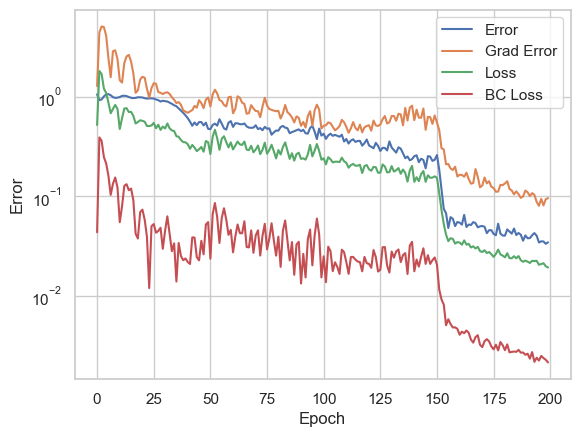

In [30]:
plot_errors_from_data(errors, grad_errors, loss, BC_loss)

In [31]:
errors, grad_errors, loss, BC_loss = train(model_non_div_form, n_epochs=200, seed=0, optimizer_threshold=150, save_BC_loss=True)

Using Cuda
Solving the PDE: EigenfunctionSourceNonDF(a=1, b=1, backend=torch)


100%|██████████| 50/50 [00:19<00:00,  2.55it/s]


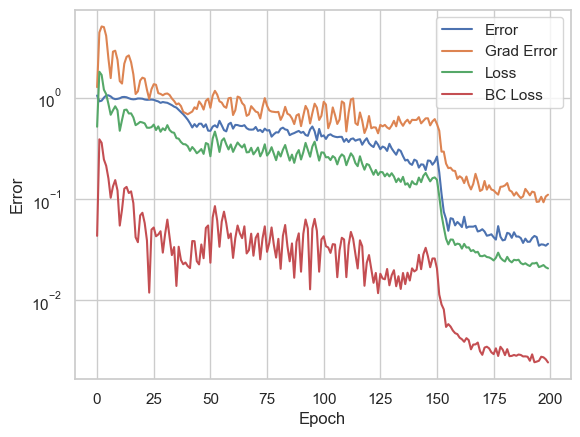

In [32]:
plot_errors_from_data(errors, grad_errors, loss, BC_loss)

## Example 2: Polynomial with inhomogeneous boundary condition

The solution \( u(x, y) \) for the Poisson equation
\begin{equation}
\frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2} = -2 ( y (1 - y) + x (1-x))
\end{equation}

with the boundary condition

\begin{equation}
u(0, y) = u(1, y) = u(x, 0) = u(x, 1) = 5
\end{equation}

has analytical solution:

\begin{equation}
u(x, y) = x (1-x) y (1 - y)  + 5
\end{equation}



In [33]:
poly_inhomo_BC_divergence_form = InhomoBCDF()
poly_inhomo_BC_divergence_form.is_in_divergence_form

True

In non-divergence form

$$A(x,y):H(x,y) = f(x,y)$$

Where
\begin{equation}
A(x, y) = \begin{pmatrix}
1 & 0 \\
0 & 1 \\
\end{pmatrix}
\end{equation}

and
\begin{equation}
H(x, y) = \begin{pmatrix}
\frac{\partial^2 u}{\partial x^2} & \frac{\partial^2 u}{\partial x \partial y} \\
\frac{\partial^2 u}{\partial y \partial x} & \frac{\partial^2 h}{\partial y^2}
\end{pmatrix}
\end{equation}


With 

$$f(x,y) = -2 ( y (1 - y) + x (1-x))$$

In [34]:
poly_inhomo_BC_non_divergence_form = InhomoBCNonDF()
poly_inhomo_BC_non_divergence_form.is_in_divergence_form

False

### Training

In [35]:
torch.manual_seed(0)
model_div_form =  ModelV0(poly_inhomo_BC_divergence_form, has_embedding_layer=False)
torch.manual_seed(0)
model_non_div_form =  ModelV0(poly_inhomo_BC_non_divergence_form, has_embedding_layer=False)

In [36]:
errors, grad_errors, loss, BC_loss = train(model_div_form, n_epochs=200, seed=0, optimizer_threshold=150, save_BC_loss=True)

Using Cuda
Solving the PDE: InhomoBCDF(backend=torch)


100%|██████████| 50/50 [00:20<00:00,  2.40it/s]


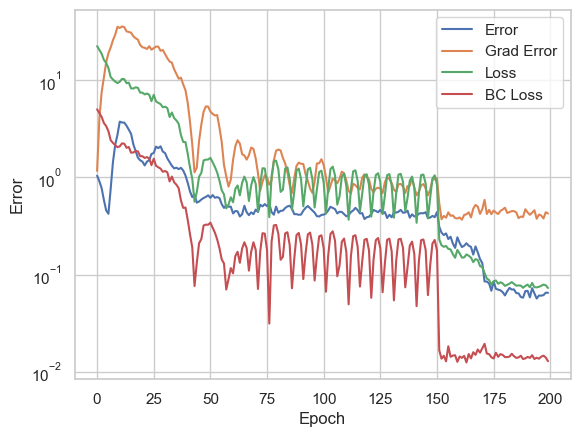

In [37]:
plot_errors_from_data(errors, grad_errors, loss, BC_loss)

In [38]:
errors, grad_errors, loss, BC_loss = train(model_non_div_form, n_epochs=200, seed=0, optimizer_threshold=150, save_BC_loss=True)

Using Cuda
Solving the PDE: InhomoBCNonDF(backend=torch)


100%|██████████| 50/50 [00:20<00:00,  2.48it/s]


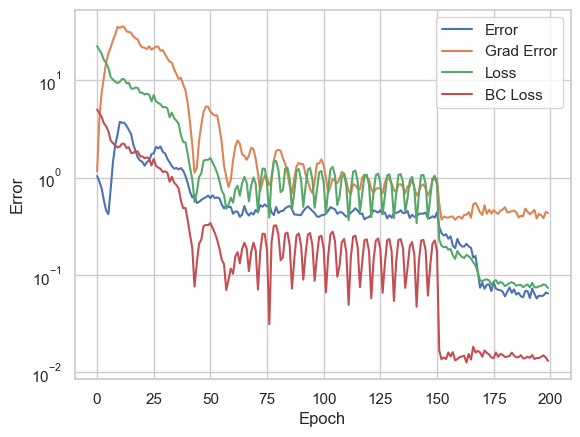

In [39]:
plot_errors_from_data(errors, grad_errors, loss, BC_loss)

## Example 3: Constant source term with complicated boundary condition

The solution \( u(x, y) \) for the Poisson equation
\begin{equation}
\frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2} = 4
\end{equation}

with the boundary condition

\begin{equation}
u(x, y) = x^2 + y^2
\end{equation}

has analytical solution:

\begin{equation}
u(x, y) = x^2 + y^2
\end{equation}



In [40]:
const_source_divergence_form = ConstantSourceDF()
const_source_divergence_form.is_in_divergence_form

True

becomes

$$A(x,y):H(x,y) = f(x,y)$$

Where
\begin{equation}
A(x, y) = \begin{pmatrix}
1 & 0 \\
0 & 1 \\
\end{pmatrix}
\end{equation}

and
\begin{equation}
H(x, y) = \begin{pmatrix}
\frac{\partial^2 u}{\partial x^2} & \frac{\partial^2 u}{\partial x \partial y} \\
\frac{\partial^2 u}{\partial y \partial x} & \frac{\partial^2 h}{\partial y^2}
\end{pmatrix}
\end{equation}


With 
$$f(x,y) = 4$$

In [41]:
const_source_non_divergence_form = ConstantSourceNonDF()
const_source_non_divergence_form.is_in_divergence_form

False

### Training

In [42]:
torch.manual_seed(0)
model_div_form =  ModelV0(const_source_divergence_form, has_embedding_layer=False)
torch.manual_seed(0)
model_non_div_form =  ModelV0(const_source_non_divergence_form, has_embedding_layer=False)

In [43]:
errors, grad_errors, loss, BC_loss = train(model_div_form, n_epochs=200, seed=0, optimizer_threshold=150, save_BC_loss=True)

Using Cuda
Solving the PDE: ConstantSourceDF(const_value=4.0, backend=torch)


100%|██████████| 50/50 [00:25<00:00,  1.95it/s]


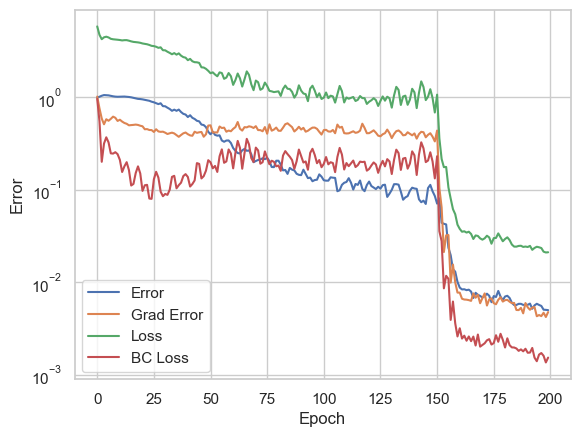

In [44]:
plot_errors_from_data(errors, grad_errors, loss, BC_loss)

In [45]:
errors, grad_errors, loss, BC_loss = train(model_non_div_form, n_epochs=200, seed=0, optimizer_threshold=150, save_BC_loss=True)

Using Cuda
Solving the PDE: ConstantSourceNonDF(const_value=4.0, backend=torch)


100%|██████████| 50/50 [00:19<00:00,  2.61it/s]


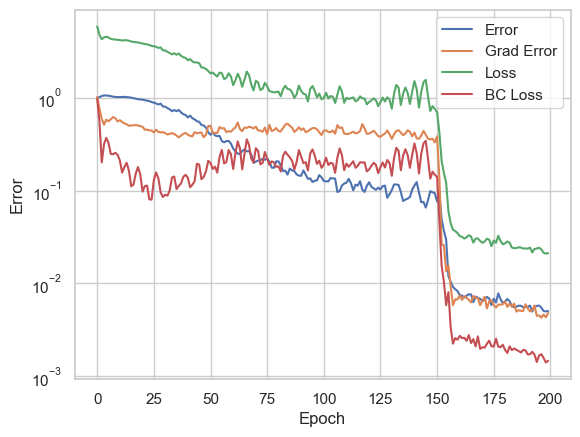

In [46]:
plot_errors_from_data(errors, grad_errors, loss, BC_loss)